In [1]:
# test_metrics_path = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_[2022-11-28,15:18].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_continuous_[2022-11-28,15:25].pkl"
# undersampling_interval = 10

# test_metrics_path = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_[2022-11-29,09:47].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_continuous_[2022-11-29,10:58].pkl"
# undersampling_interval = 1


# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_[2022-11-29,11:02].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_continuous_[2022-11-29,14:56].pkl"
# undersampling_interval = 1

# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_no_sigmoid_[2022-11-29,15:56].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_no_sigmoid_continuous_[2022-11-29,16:19].pkl"
# undersampling_interval = 10


# test_metrics_path = "BCI_root/Results/metrics_Bayesian_EEGNet_Variance_mock_[2022-12-02,08:57].pkl"
# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_mock_continuous_[2022-12-02,09:17].pkl"
# undersampling_interval = 8


# test_metrics_path_continuous = "BCI_root/Results/metrics_Bayesian_CorreiaNet_Variance_mock_continuous_[2022-12-02,10:13].pkl"
# undersampling_interval = 10

###### Everything above here doesn't have participant indices recorded!



# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_CorreiaNet_continuous_[2022-12-06,10:21].pkl"
# undersampling_interval = 10





# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_EEGNet_continuous_[2022-12-06,10:47].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_20Ensemble_EEGNet_continuous_[2022-12-06,11:46].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_BayesianEEGNet_continuous_[2022-12-06,11:54].pkl"
# undersampling_interval = 10

test_metrics_path_continuous = "BCI_root/Results/metrics_BayesianCorreiaNet_continuous_[2022-12-06,12:24].pkl"
undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_UnbalancedBayesianCorreiaNet_continuous_[2022-12-06,13:03].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Unbalanced20EnsembleEEGNet_continuous_[2022-12-06,15:17].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Balanced20EnsembleCorreiaNet_continuous_[2022-12-06,19:55].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_NoStrideCorreiaNetEnsemble_continuous_[2022-12-07,11:37].pkl"
# undersampling_interval = 10




# test_metrics_path_continuous = "BCI_root/Results/metrics_Proper_EEGNet_continuous_[2022-12-07,12:13].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_5ensembleProper_EEGNet_continuous_[2022-12-07,12:37].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_CrossEntropy5ensembleProper_EEGNet_continuous_[2022-12-07,14:52].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_400ms5ensembleCorreiaNet_continuous_[2022-12-07,16:39].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_600ms5ensembleCorreiaNet_continuous_[2022-12-07,16:52].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_continuous_[2022-12-08,15:41].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_continuous_[2022-12-08,15:56].pkl" # This one uses the "correct" number of PCAs (expl 99%)
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_prewindow_continuous_[2022-12-08,18:05].pkl" 
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_prewindow_600_continuous_[2022-12-08,18:09].pkl" 
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_prewindow_600x600_continuous_[2022-12-08,18:15].pkl" 
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_prewindow_600x600_continuous_[2022-12-09,09:38].pkl" # actualy 300 x 600 
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_ProperEEGNetEnsembleWithPreWindow_continuous_[2022-12-09,10:37].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_600x600LDA_continuous_[2022-12-09,11:06].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_600x600ProperEEGEnsemble_continuous_[2022-12-09,12:13].pkl"
# undersampling_interval = 10


test_metrics_path_continuous = "BCI_root/Results/metrics_TorchEEGNet5Ensemble_continuous_[2022-12-09,14:22].pkl"
undersampling_interval = 10




# test_metrics_path_continuous = "BCI_root/Results/metrics_FBCNet5Ensemble_continuous_[2022-12-12,08:57].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_UnbalancedFBCNet5Ensemble_continuous_[2022-12-12,09:21].pkl"
# undersampling_interval = 10



# test_metrics_path_continuous = "BCI_root/Results/metrics_LargeTorchEEGEnsemble_continuous_[2022-12-12,14:16].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Causal_continuous_[2022-12-15,17:53].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_Causal_continuous_[2022-12-19,10:34].pkl"  # This one uses ICA
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_ICA_OnTestData_continuous_[2022-12-19,11:23].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_NoICA_LDA_continuous_[2022-12-19,11:31].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Small_ICA_LDA_continuous_[2022-12-19,11:40].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Test_ICA_Pre_Bandpass_continuous_[2022-12-19,12:19].pkl" # This is aggressive on the ICA
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Test_ICA_Pre_Bandpass_CNN_continuous_[2022-12-19,12:34].pkl" # This is aggressive on the ICA
# undersampling_interval = 10


test_metrics_path_continuous = "BCI_root/Results/metrics_Test_Interpolate_HEOG_continuous_[2022-12-19,15:27].pkl" # This is aggressive on the ICA
undersampling_interval = 10


test_metrics_path_continuous = "BCI_root/Results/metrics_Test_Interpolate_HEOG_CNN_continuous_[2022-12-19,15:40].pkl" # This is aggressive on the ICA
undersampling_interval = 10



test_metrics_path_continuous = "BCI_root/Results/metrics_HEOG_LDA_Fair_Test_continuous_[2022-12-19,16:05].pkl" # This is aggressive on the ICA
undersampling_interval = 10

test_metrics_path_continuous = "BCI_root/Results/metrics_EEGNet_Disentangling_continuous_[2023-01-03,17:03].pkl"
undersampling_interval = 10



# The predictions for the following ensembles are actually the predicitons of a single model, so they should deviate/be worse than the whole ensemble performs!
# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_Disentangling_continuous_[2023-01-06,10:17].pkl"
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_Disentangling_Large_Connection_continuous_[2023-01-06,11:38].pkl"
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_Disentangling_Large_Connection_softmax_uncertainties_continuous_[2023-01-06,12:38].pkl" 
# here the uncertainties are NOT Shannon Entropy, they are simply p(y) (effectively foregoing the entropy function)
undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_Disentangling_0NLL_continuous_[2023-01-09,15:50].pkl" 
# undersampling_interval = 10

# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_Disentangling_0.5NLL_continuous_[2023-01-10,09:19].pkl" 
# undersampling_interval = 10


# test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_Disentangling_1.0NLL_continuous_[2023-01-10,10:11].pkl" 
# undersampling_interval = 10

test_metrics_path_continuous = "BCI_root/Results/metrics_Ensemble_EEGNet_continuous_[2023-01-10,10:49].pkl" 
undersampling_interval = 10

test_metrics_path_continuous = "BCI_root/Results/metrics_LDA_FCzCz_continuous_[2023-01-12,12:41].pkl" 
undersampling_interval = 10


In [2]:
from src.data.util import open_file_pickle
import torch
import numpy as np
from src.util.util import milliseconds_to_samples, samples_to_milliseconds
import matplotlib.pyplot as plt
from tqdm import tqdm
from dataclasses import fields
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression

/Users/ivopascal/.local/share/virtualenvs/Error-perception-classification-in-BCI-usi-IO2CUxHQ/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Settings loaded


In [3]:
# test_metrics = open_file_pickle(test_metrics_path)
test_metrics_continuous = open_file_pickle(test_metrics_path_continuous).pred_labels

In [4]:
len(test_metrics_continuous.y_predicted)

560463

(560462,)
torch.Size([560462])
1.0
[0.]
0.0
0.0 0.0
(560461,)
torch.Size([560461])
1.0
[0.]
0.0
0.0 0.0
(560460,)
torch.Size([560460])
1.0
[0.]
0.0
0.0 0.0
(560459,)
torch.Size([560459])
1.0
[0.]
0.0
0.0 0.0


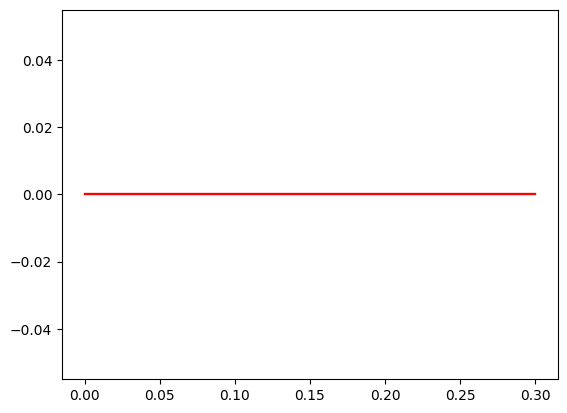

In [5]:
best_score = -1
best_i = 1
best_reg = None
decorrelate_variance = False


for i in range(1, 5):
    n = i

    y = test_metrics_continuous.y_variance[n:]
    x = np.abs(np.diff(test_metrics_continuous.y_predicted, n=n))
    print(x.shape)
    print(y.shape)
    m, b = np.polyfit(x, y, 1)

    plt.plot([0, 0.3], m*np.array([0, 0.3])+b, color='red')
    

    reg = LinearRegression().fit(x.reshape(-1, 1), y)
    
    score = reg.score(x.reshape(-1, 1), y)
    
    if decorrelate_variance:
        pred_variances = reg.predict(np.abs(np.diff(test_metrics_continuous.y_predicted, n=i, prepend=[0] * i)).reshape(-1, 1))
        test_metrics_continuous.y_variance = test_metrics_continuous.y_variance - pred_variances + pred_variances.mean()
    
    if score > best_score:
        best_score = score
        best_i = i
        best_reg = reg
    
    print(score)
    print(reg.coef_)
    print(reg.intercept_)
    print(m, b)


In [6]:
best_score

1.0

In [7]:
for ms in range(10, 100, 10):

    truncate = -(test_metrics_continuous.y_predicted.shape[0] % milliseconds_to_samples(ms))

    pred_intervals = test_metrics_continuous.y_predicted[:truncate].reshape(-1, milliseconds_to_samples(ms))
    # pred_intervals = test_metrics_continuous.y_predicted[:truncate].reshape(milliseconds_to_samples(ms), -1)

    print(f"Average variance per {ms}ms is {pred_intervals.var(axis=1).mean()}")
    # print(f"Average variance per {ms}ms is {pred_intervals.var(axis=0).mean()}")

for ms in range(100, 1000, 100):

    truncate = -(test_metrics_continuous.y_predicted.shape[0] % milliseconds_to_samples(ms))

    pred_intervals = test_metrics_continuous.y_predicted[:truncate].reshape(-1, milliseconds_to_samples(ms))
    # pred_intervals = test_metrics_continuous.y_predicted[:truncate].reshape(milliseconds_to_samples(ms), -1)

    print(f"Average variance per {ms}ms is {pred_intervals.var(axis=1).mean()}")
    # print(f"Average variance per {ms}ms is {pred_intervals.var(axis=0).mean()}")



Average variance per 10ms is 0.018186386646071275
Average variance per 20ms is 0.024346362305272245
Average variance per 30ms is 0.02705030887752671
Average variance per 40ms is 0.02859156287853669
Average variance per 50ms is 0.029487624208707305
Average variance per 60ms is 0.029992582322924646
Average variance per 70ms is 0.030262627060737866
Average variance per 80ms is 0.030355708043343328
Average variance per 90ms is 0.030368361986804294
Average variance per 100ms is 0.0303235418599452
Average variance per 200ms is 0.03020469041355033
Average variance per 300ms is 0.03014829215508126
Average variance per 400ms is 0.03011501952012585
Average variance per 500ms is 0.030093983234564633
Average variance per 600ms is 0.030081567070413963
Average variance per 700ms is 0.030070338171162014
Average variance per 800ms is 0.030060079843356496
Average variance per 900ms is 0.030054998995228434


In [8]:
test_metrics_continuous.y_variance

tensor([0., 0., 0.,  ..., 0., 0., 0.], dtype=torch.float64)

In [9]:
test_metrics_continuous.y_subj_idx.shape

torch.Size([560463])

In [10]:
print(test_metrics_continuous.y_in_distribution.sum())


tensor(2673)


In [11]:
test_metrics_continuous.y_predicted

tensor([0.9319, 0.9562, 0.9584,  ..., 0.4907, 0.4747, 0.4209],
       dtype=torch.float64)

In [12]:
test_metrics_continuous.y_variance.shape

torch.Size([560463])

In [13]:
for i in range(1, 7):
    print((test_metrics_continuous.y_subj_idx == i).sum())
print(test_metrics_continuous.y_in_distribution.sum())
print(test_metrics_continuous.y_predicted.shape)

tensor(93239)
tensor(95134)
tensor(93753)
tensor(92318)
tensor(93035)
tensor(92984)
tensor(2673)
torch.Size([560463])


In [14]:
continues_true_rate = 1

if continues_true_rate > 1:
    test_metrics_continuous.y_predicted = test_metrics_continuous.y_predicted.reshape(-1, continues_true_rate).max(axis=1).values
    test_metrics_continuous.y_true = test_metrics_continuous.y_true.reshape(-1, continues_true_rate).min(axis=1).values
    test_metrics_continuous.y_in_distribution = test_metrics_continuous.y_in_distribution.reshape(-1, continues_true_rate).max(axis=1).values
    test_metrics_continuous.y_subj_idx = test_metrics_continuous.y_subj_idx.reshape(-1, continues_true_rate)[:, 0]
    test_metrics_continuous.y_variance = test_metrics_continuous.y_variance.reshape(-1, continues_true_rate).mean(axis=1)



In [15]:
print(test_metrics_continuous.y_in_distribution.sum())
print(test_metrics_continuous.y_predicted.shape)

tensor(2673)
torch.Size([560463])


In [16]:
test_metrics_continuous.y_in_distribution = test_metrics_continuous.y_in_distribution.type('torch.BoolTensor')

In [17]:
test_metrics_continuous.y_in_distribution

tensor([False, False, False,  ..., False, False, False])

In [18]:
for i in range(1, 7):
    print((test_metrics_continuous.y_subj_idx == i).sum())


tensor(93239)
tensor(95134)
tensor(93753)
tensor(92318)
tensor(93035)
tensor(92984)


In [19]:
[field.name for field in fields(test_metrics_continuous)]

['y_true',
 'y_predicted',
 'y_variance',
 'y_epi_uncertainty',
 'y_ale_uncertainty',
 'y_in_distribution',
 'y_subj_idx']

In [20]:
(abs(test_metrics_continuous.y_predicted - test_metrics_continuous.y_true) < 0.5).numpy().mean()

0.676538861619768

In [21]:
(abs(test_metrics_continuous.y_predicted - test_metrics_continuous.y_true) < 0.5)[test_metrics_continuous.y_in_distribution].numpy().mean()

0.6659184436962214

In [22]:
event_indices = np.where(test_metrics_continuous.y_in_distribution.numpy())

In [23]:
test_metrics_continuous.y_in_distribution.numpy().mean()

0.004769271120484314

In [24]:
y_true_id = 1 - test_metrics_continuous.y_true.clone().double()
y_true_id[~test_metrics_continuous.y_in_distribution] = 0.5

In [25]:
y_true_id[test_metrics_continuous.y_in_distribution].mean()

tensor(0.1934, dtype=torch.float64)

In [26]:
(~test_metrics_continuous.y_in_distribution).sum()

tensor(557790)

In [27]:
test_metrics_continuous.y_true.shape

torch.Size([560463])

tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)


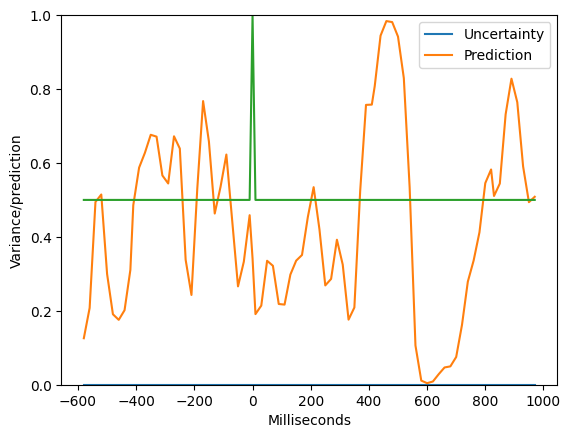

tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)


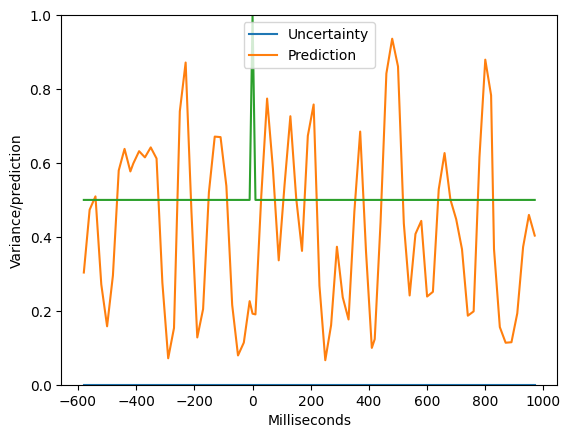

tensor(0)
tensor(1)


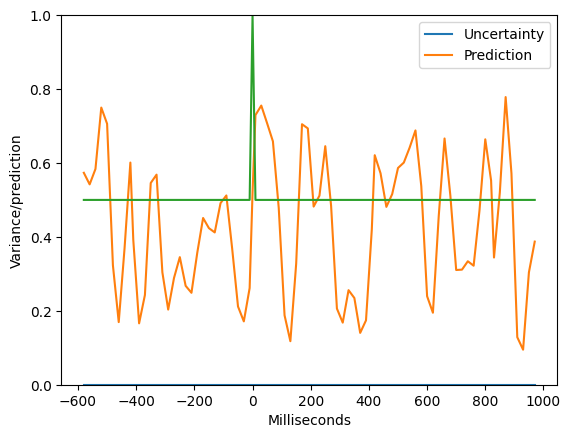

tensor(1)


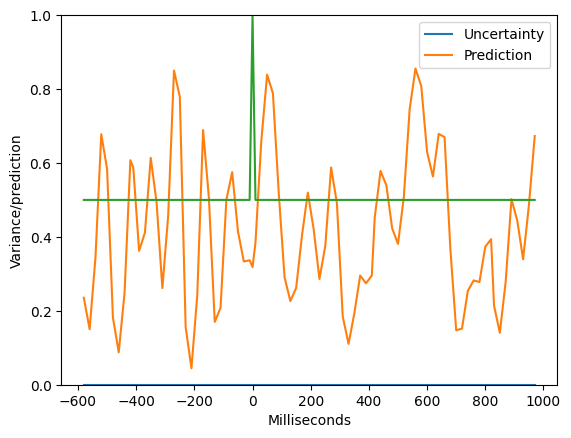

tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)


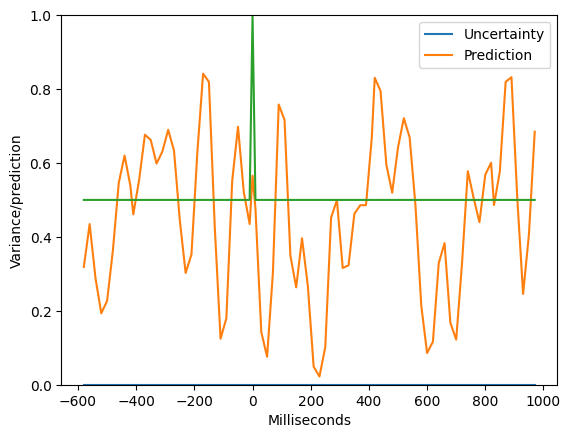

tensor(0)
tensor(0)
tensor(0)
tensor(1)


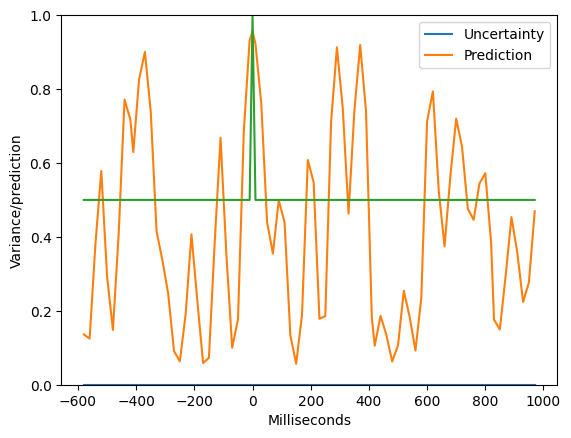

tensor(0)
tensor(1)


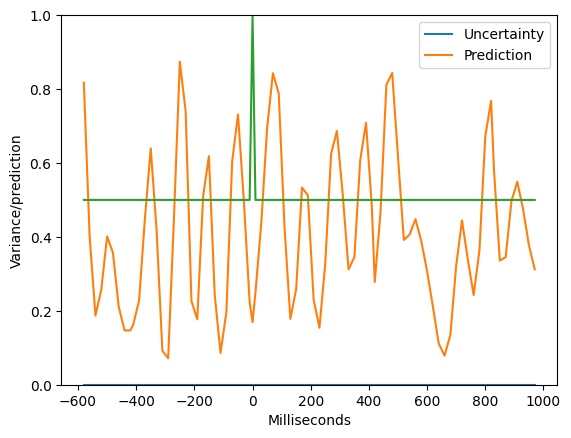

tensor(1)


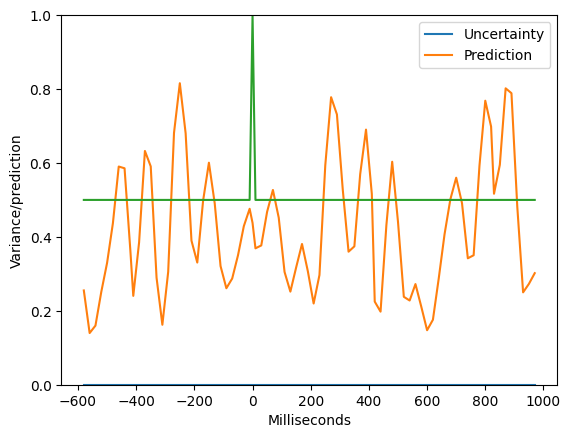

tensor(1)


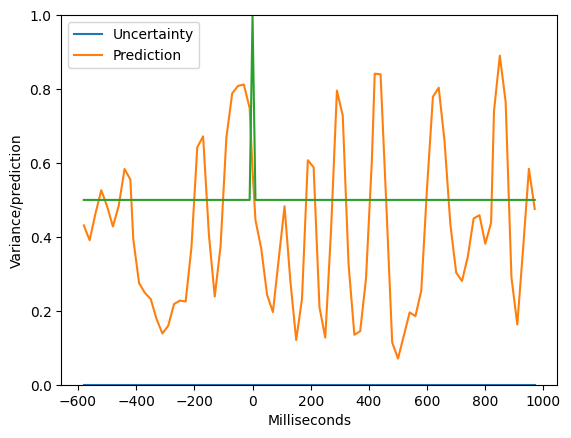

tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)


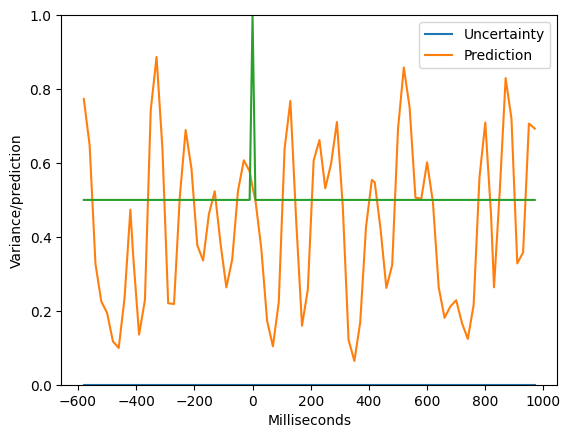

tensor(0)
tensor(0)


In [28]:
lower_window_ms = -600
upper_window_ms = 1000
lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling_interval )
upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling_interval )
event_index = 1
disentangle_uncertainty = False

x = [samples_to_milliseconds(step) * undersampling_interval for step in range(lower_window, upper_window)]

# for event_index in range(len(event_indices[0])):
for event_index in range(50):
    y_true = 1 - (test_metrics_continuous.y_true[event_indices[0][event_index]])
    print(y_true)
    
    if not y_true:
        continue

    color = "green" if y_true else "red"

    
    if disentangle_uncertainty:
        plt.plot(x, test_metrics_continuous.y_ale_uncertainty[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="ale")
        plt.plot(x, test_metrics_continuous.y_epi_uncertainty[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="epi")
    else:
        plt.plot(x, test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Uncertainty")
    plt.plot(x, 1 - test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Prediction")

    plt.xlabel("Milliseconds")
    plt.ylabel("Variance/prediction")
    plt.legend()
    # plt.vlines([-50, 0, 50], ymin=0, ymax=1, color=[color])
    plt.plot(x, y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window], label="Truth")
    plt.ylim(0, 1)

    plt.show()

In [29]:
test_metrics_continuous.y_variance[~test_metrics_continuous.y_in_distribution].mean()

tensor(0., dtype=torch.float64)

In [30]:
test_metrics_continuous.y_variance[test_metrics_continuous.y_in_distribution].mean()

tensor(0., dtype=torch.float64)

In [31]:
def make_average_around_event(metrics, lower_window_ms, upper_window_ms, undersampling=undersampling_interval, y_to_plot=None, label_prefix=""):
    undersampling = undersampling * continues_true_rate

    lower_window = int(milliseconds_to_samples(lower_window_ms) / undersampling )
    upper_window = int(milliseconds_to_samples(upper_window_ms) / undersampling )


    x = [samples_to_milliseconds(step) * undersampling for step in range(lower_window, upper_window)]

    y_true_id = 1 - metrics.y_true.clone().double()
    y_true_id[~metrics.y_in_distribution] = 0.5
    
    event_indices = np.where(metrics.y_in_distribution.numpy())

    y_variances = []
    y_predictions = []
    y_trues = []
    y_subj = []
    y_ales = []
    y_epis = []
    for event_index in range(len(event_indices[0])):
        y_true = 1 - (metrics.y_true[event_indices[0][event_index]])
        # print(y_true)

        if y_to_plot != None and y_to_plot != y_true:
            continue

        color = "green" if y_true else "red"

        y_subj.append(metrics.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_variances.append(metrics.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_predictions.append(1 - metrics.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
        
        if disentangle_uncertainty:
            y_ales.append(metrics.y_ale_uncertainty[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
            y_epis.append(metrics.y_epi_uncertainty[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])


    
    stacked_subjects = torch.vstack(y_subj)
    stacked_variances = torch.vstack(y_variances)
    stacked_predictions = torch.vstack(y_predictions)
    stacked_trues = torch.vstack(y_trues)
    
    if disentangle_uncertainty:
        stacked_ales = torch.vstack(y_ales)
        stacked_epis = torch.vstack(y_epis)

    predictions_per_participant = []
    variances_per_participant = []
    ales_per_participant = []
    epis_per_participant = []
    trues_per_participant = []

    for i in range(1, 7):
        predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
        variances_per_participant.append(stacked_variances[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
        trues_per_participant.append(stacked_trues[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
        
        if disentangle_uncertainty:
            ales_per_participant.append(stacked_ales[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))
            epis_per_participant.append(stacked_epis[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]).mean(axis=0))

    avg_variances = torch.vstack(variances_per_participant).mean(axis=0)
    std_variances = torch.vstack(variances_per_participant).std(axis=0)

    avg_predictions = torch.vstack(predictions_per_participant).mean(axis=0)
    std_predictions = torch.vstack(predictions_per_participant).std(axis=0)

    avg_trues = torch.vstack(trues_per_participant).mean(axis=0)
    std_trues = torch.vstack(trues_per_participant).std(axis=0)
    
    if disentangle_uncertainty:
        avg_ales = torch.vstack(ales_per_participant).mean(axis=0)
        std_ales = torch.vstack(ales_per_participant).std(axis=0)
        
        avg_epis = torch.vstack(epis_per_participant).mean(axis=0)
        std_epis = torch.vstack(epis_per_participant).std(axis=0)


    
    if disentangle_uncertainty:
        plt.plot(x, avg_ales, label=f"{label_prefix}aleatoric")
        plt.fill_between(x, avg_ales - std_ales, avg_ales + std_ales , label=f"_{label_prefix}aleatoric", alpha=0.1)
        
        plt.plot(x, avg_epis, label=f"{label_prefix}epistemic")
        plt.fill_between(x, avg_epis - std_epis, avg_epis + std_epis , label=f"_{label_prefix}epistemic", alpha=0.1)
        

    else:
        plt.plot(x, avg_variances, label=f"{label_prefix}Uncertainty")
        plt.fill_between(x, avg_variances - std_variances, avg_variances + std_variances , label=f"_{label_prefix}Variances", alpha=0.1)
        


    plt.plot(x, avg_predictions, label=f"{label_prefix}Predictions")
    plt.fill_between(x, avg_predictions - std_predictions, avg_predictions + std_predictions , label=f"_{label_prefix}Predictions", alpha=0.1)

    plt.plot(x, avg_trues, label=f"{label_prefix}Truths")
    plt.fill_between(x, avg_trues - std_trues, avg_trues + std_trues , label=f"_{label_prefix}Truths", alpha=0.1)

    plt.legend(fontsize=10)
    plt.xlabel("Time (ms)")
    plt.ylabel("Variance / prediction")
    plt.ylim(0, 1)

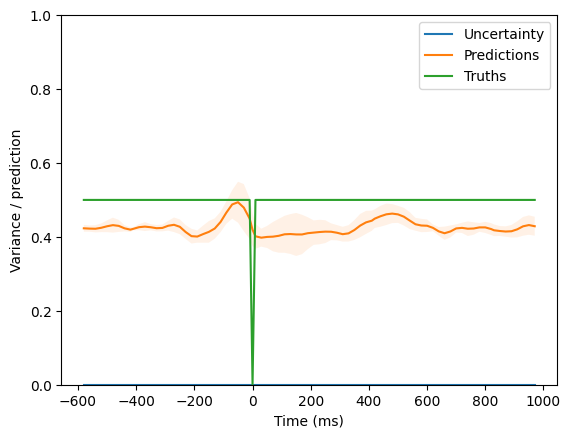

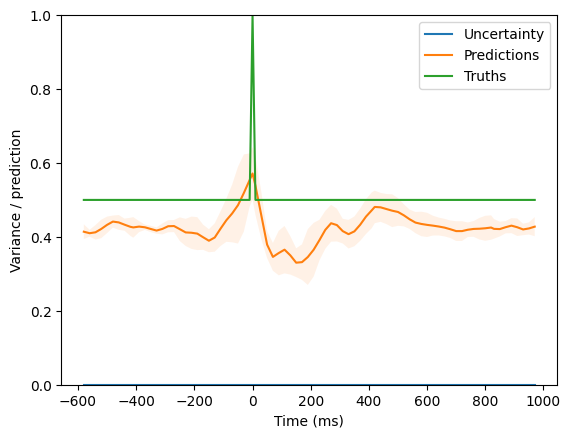

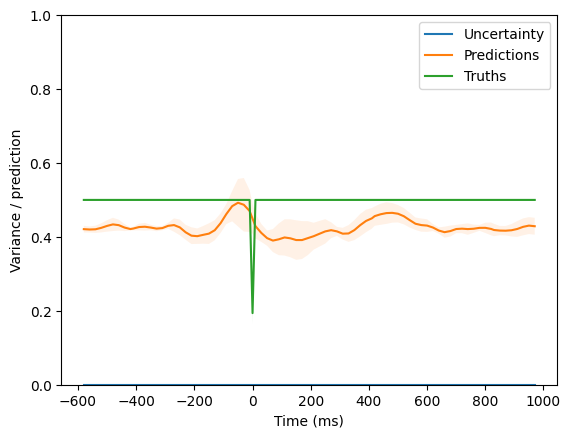

In [32]:
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 0)
plt.legend()
plt.show()
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 1)
plt.legend()
plt.show()
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = None)
plt.legend()
plt.show()



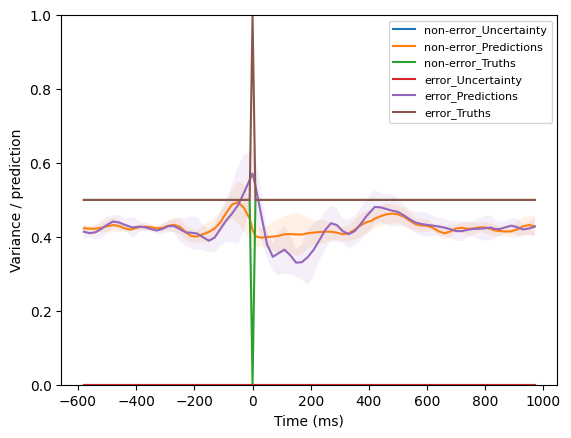

In [33]:
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 0, label_prefix="non-error_")
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 1, label_prefix="error_")
plt.legend(fontsize=8)
plt.show()

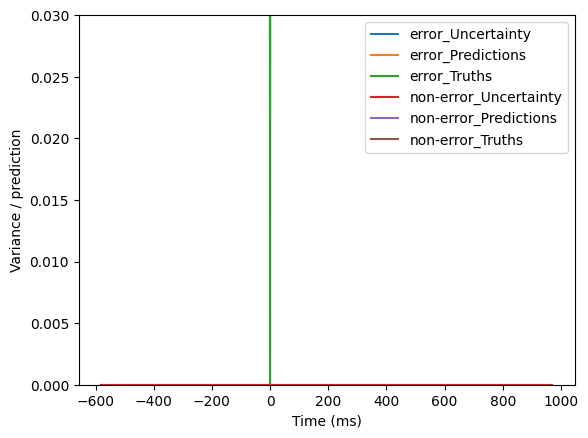

In [34]:
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 0, label_prefix="error_")
make_average_around_event(test_metrics_continuous, -600, 1000, y_to_plot = 1,label_prefix="non-error_")
plt.legend()
plt.ylim(0.0, 0.03)
plt.show()

In [35]:
# make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 0, label_prefix="error ")
# make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 1, label_prefix="non-error ")
# plt.legend()
# plt.show()

In [36]:
# make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 0, label_prefix="error ")
# make_average_around_event(test_metrics_continuous, -3000, 10000, y_to_plot = 1, label_prefix="non-error ")
# plt.legend()
# plt.ylim(0.004, 0.03)
# plt.show()

In [37]:
# make_average_around_event(test_metrics_continuous, -3000, 6000, y_to_plot = None)

In [38]:

y_variances = []
y_predictions = []
y_trues = []
y_subj = []
for event_index in range(len(event_indices[0])):
    y_true = (test_metrics_continuous.y_true[event_indices[0][event_index]])

    color = "green" if y_true else "red"

    y_variances.append(test_metrics_continuous.y_variance[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_predictions.append(test_metrics_continuous.y_predicted[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    y_subj.append(test_metrics_continuous.y_subj_idx[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])
    
    y_trues.append(y_true_id[event_indices[0][event_index] + lower_window: event_indices[0][event_index] + upper_window])


In [39]:


stacked_subjects = torch.vstack(y_subj)
stacked_variances = torch.vstack(y_variances)
stacked_predictions = torch.vstack(y_predictions)
stacked_trues = torch.vstack(y_trues)

predictions_per_participant = []
variances_per_participant = []
trues_per_participant = []

for i in range(1, 7):
    predictions_per_participant.append(stacked_predictions[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))
    variances_per_participant.append(stacked_variances[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))
    trues_per_participant.append(stacked_trues[stacked_subjects == i].reshape(-1, stacked_subjects.shape[1]))

In [40]:
predictions_per_participant[0].reshape(-1).shape

torch.Size([35478])

In [41]:
predictions_per_participant = []
variances_per_participant = []
trues_per_participant = []
y_in_distribution_per_participant  = []

for i in range(1, 7):
    predictions_per_participant.append(test_metrics_continuous.y_predicted[test_metrics_continuous.y_subj_idx == i])
    variances_per_participant.append(test_metrics_continuous.y_variance[test_metrics_continuous.y_subj_idx == i])
    trues_per_participant.append(test_metrics_continuous.y_true[test_metrics_continuous.y_subj_idx == i])
    y_in_distribution_per_participant.append(test_metrics_continuous.y_in_distribution[test_metrics_continuous.y_subj_idx == i])

In [42]:
predictions_per_participant[1].shape

torch.Size([95134])

Best Threshold=0.573290, G-Mean=0.742
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.00      0.77      0.00        94
           1       1.00      0.53      0.69     93145

    accuracy                           0.53     93239
   macro avg       0.50      0.65      0.35     93239
weighted avg       1.00      0.53      0.69     93239



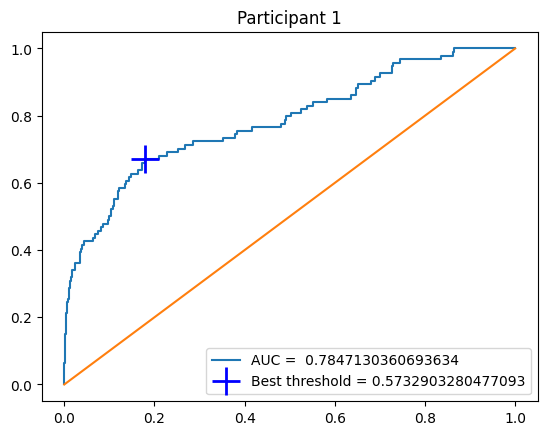

Best Threshold=0.546117, G-Mean=0.689
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.00      0.75      0.00        97
           1       1.00      0.59      0.74     95037

    accuracy                           0.59     95134
   macro avg       0.50      0.67      0.37     95134
weighted avg       1.00      0.59      0.74     95134



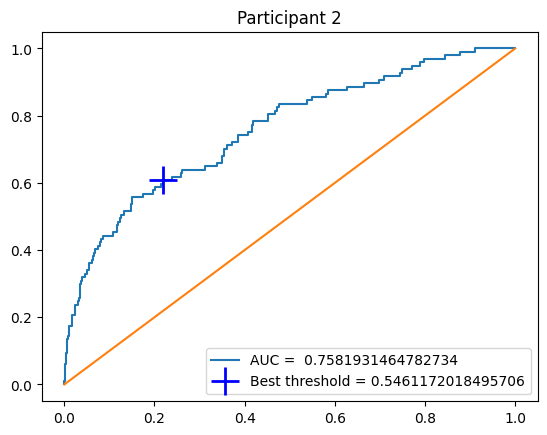

Best Threshold=0.565669, G-Mean=0.783
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.00      0.91      0.00        67
           1       1.00      0.55      0.71     93686

    accuracy                           0.55     93753
   macro avg       0.50      0.73      0.36     93753
weighted avg       1.00      0.55      0.71     93753



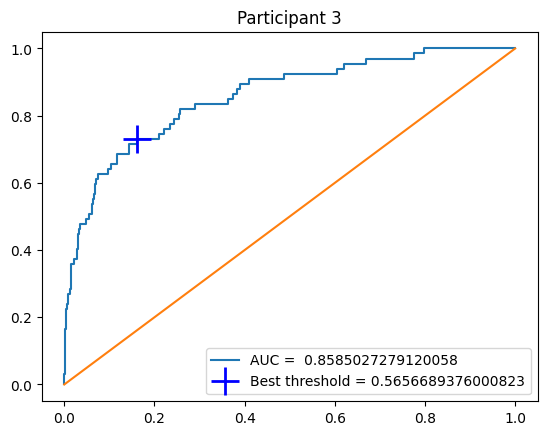

Best Threshold=0.444105, G-Mean=0.586
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.00      0.31      0.00        81
           1       1.00      0.79      0.88     92237

    accuracy                           0.79     92318
   macro avg       0.50      0.55      0.44     92318
weighted avg       1.00      0.79      0.88     92318



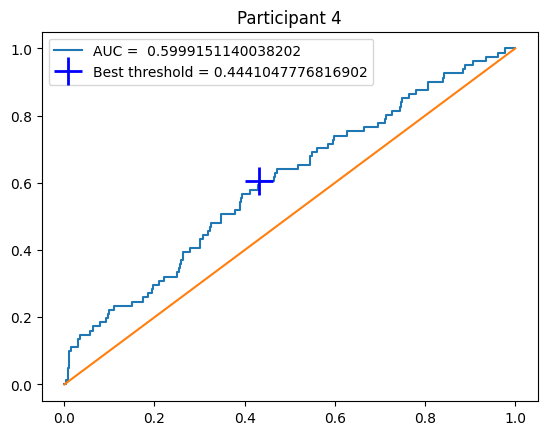

Best Threshold=0.473066, G-Mean=0.654
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.00      0.58      0.00        98
           1       1.00      0.70      0.82     92937

    accuracy                           0.70     93035
   macro avg       0.50      0.64      0.41     93035
weighted avg       1.00      0.70      0.82     93035



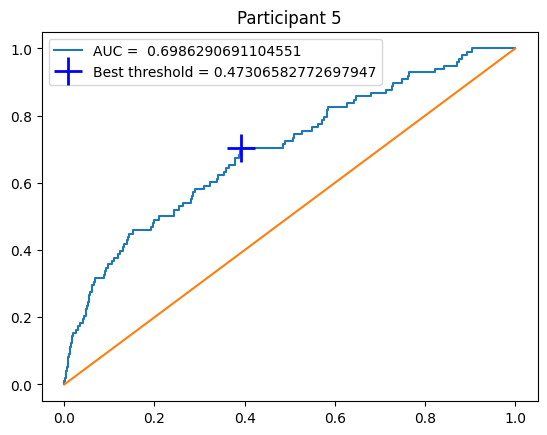

Best Threshold=0.431534, G-Mean=0.566
Average variance: 0.0
              precision    recall  f1-score   support

           0       0.00      0.34      0.00        80
           1       1.00      0.71      0.83     92904

    accuracy                           0.71     92984
   macro avg       0.50      0.53      0.42     92984
weighted avg       1.00      0.71      0.83     92984



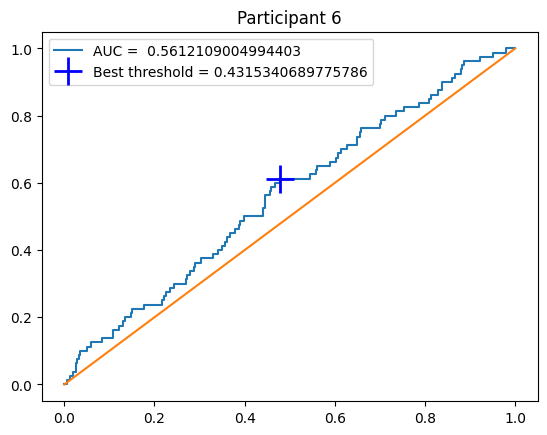

/Users/ivopascal/.local/share/virtualenvs/Error-perception-classification-in-BCI-usi-IO2CUxHQ/lib/python3.9/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

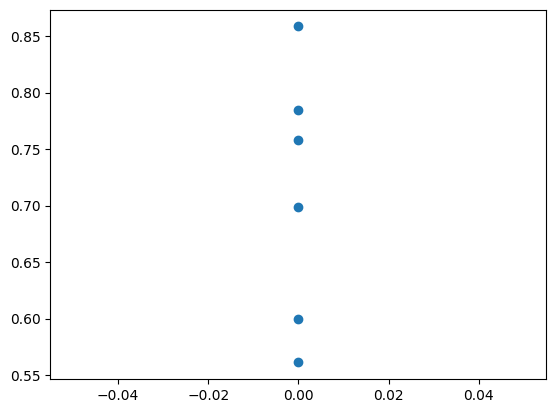

In [43]:
optimal_thresholds = []
interval_preds = []
interval_truths = []

aucs = []
avg_variances = []
for i, zipped in enumerate(zip(trues_per_participant, predictions_per_participant, y_in_distribution_per_participant)):
    participant_trues, participant_predictions, participan_in_distribution = zipped
    binarized_participant_trues = participant_trues.clone()
    fpr, tpr, thresholds = roc_curve(1 - binarized_participant_trues.reshape(-1), 1 - participant_predictions.reshape(-1))
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    print(f"Average variance: {variances_per_participant[i].mean()}")
    avg_variances.append(variances_per_participant[i].mean())
    aucs.append(auc(fpr, tpr))

    optimal_thresholds.append(thresholds[ix])
    
    
    thresholded_participant_predictions = participant_predictions > thresholds[ix]
    
    print(classification_report(binarized_participant_trues.reshape(-1), thresholded_participant_predictions.reshape(-1)))
    

    
    
    plt.plot(fpr, tpr, label=f"AUC =  {auc(fpr, tpr)}")
    plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1))
    plt.plot(fpr[ix], tpr[ix], 'b+', mew=2, ms=20, label=f"Best threshold = {thresholds[ix]}")
    plt.legend()
    plt.title(f"Participant {i +1}")
    plt.show()
    


plt.scatter(avg_variances, aucs)

m, b = np.polyfit(avg_variances, aucs, 1)

#use red as color for regression line
plt.plot(avg_variances, m*np.array(avg_variances)+b, color='red')
plt.xlabel("Average uncertainty")
plt.ylabel("AUC")
plt.show()

In [ ]:
all_id_truths = []
all_id_preds = []

all_truths = []
all_preds = []

f1s = []
id_variances = []

for i, trues, predictions, y_in_distribution, threshold in zip(range(0, len(trues_per_participant)), trues_per_participant, predictions_per_participant, y_in_distribution_per_participant, optimal_thresholds):
    truths = trues[y_in_distribution].reshape(-1)
    preds = (predictions[y_in_distribution] > threshold).reshape(-1)
        
    print(f"Participant {i+1}")    
    print(f"Average ID variance: {variances_per_participant[i][y_in_distribution].mean()}")
    print(classification_report(truths.numpy(), preds.numpy()))
    f1s.append(f1_score(truths, preds))
    id_variances.append(variances_per_participant[i][y_in_distribution].mean())
    all_id_truths.append(truths)
    
    
    all_id_preds.append(preds)
    
    all_truths.append(trues.reshape(-1))
    all_preds.append((predictions > threshold).reshape(-1))
        
print("Averaged over all participants")        
print(classification_report(torch.hstack(all_id_truths).reshape(-1), torch.hstack(all_id_preds).reshape(-1)))
               
               
plt.scatter(id_variances, f1s)

m, b = np.polyfit(id_variances, f1s, 1)

plt.plot(id_variances, m*np.array(id_variances)+b, color='red')
plt.xlabel("Average ID uncertainty")
plt.ylabel("F1")
plt.show()


plt.scatter(avg_variances, f1s)

m, b = np.polyfit(avg_variances, f1s, 1)

plt.plot(avg_variances, m*np.array(avg_variances)+b, color='red')
plt.xlabel("Average ID+OOD uncertainty")
plt.ylabel("F1")
plt.show()


In [ ]:
stack_truths = torch.hstack(all_truths).reshape(-1).numpy()
print(1 - test_metrics_continuous.y_in_distribution.numpy().mean() * 0.2)
stack_truths = stack_truths.astype(bool)
stack_preds = torch.hstack(all_preds).reshape(-1).numpy()



In [ ]:
stack_truths.mean()

In [ ]:
print(stack_preds.reshape(int(512 / continues_true_rate), -1).max(axis=0).shape)
print(stack_preds.reshape(int(512 / continues_true_rate), -1).max(axis=0).mean())

In [ ]:
stack_truths.reshape(512, -1).min(axis=0).mean()

In [ ]:
torch.hstack(all_id_truths).reshape(-1).numpy()

In [ ]:
stack_truths.mean()

In [ ]:
stack_preds.mean()

In [ ]:
true_indices = np.where(~stack_truths)[0]
pred_indices = np.where(~stack_preds)[0]

nearest_true_indices = []
distances = []
for pred_index in range(len(stack_preds)):
    # print(pred_index)
    best_true_index = np.argmin(abs(true_indices - pred_index))
    # print(best_true_index)
    # print(true_indices[best_true_index], pred_index)
    nearest_true_indices.append(best_true_index)
    # distances.append(best_true_index)
nearest_true_indices = np.array(nearest_true_indices)

In [ ]:
distances

In [ ]:
plt.hist(list(map(samples_to_milliseconds, (nearest_true_indices[pred_indices] - pred_indices) * continues_true_rate)))

In [ ]:
distances = np.array(list(map(samples_to_milliseconds, (nearest_true_indices - range(len(stack_preds))) * continues_true_rate)))
print(max(np.abs(distances[~stack_preds])))
print(min(np.abs(distances[~stack_preds])))
print(np.mean(np.abs(distances[~stack_preds])))
print(np.mean(np.abs(distances[~stack_preds])))
print(np.sum(np.abs(distances[~stack_preds]) < 100)) # 110246 @ 1 vs @ 3 12088
print(np.sum(np.abs(distances[~stack_preds]) > 100)) # 95718  @ 1 vs @ 3 10263



In [ ]:
true_indices

In [ ]:
distances

In [ ]:
maximum_distance_to_tp = np.array(distances[:len(distances) - (len(distances) % milliseconds_to_samples(1000))]).reshape(milliseconds_to_samples(1000), -1).max(axis=0)

In [ ]:
plt.hist(maximum_distance_to_tp)

In [ ]:
stack_preds[: len(stack_preds) - (len(stack_preds) % milliseconds_to_samples(1000))].reshape(milliseconds_to_samples(1000), -1).max(axis=0).mean()

In [ ]:
np.where(stack_preds[: len(stack_preds) - (len(stack_preds) % milliseconds_to_samples(1000))].reshape(milliseconds_to_samples(1000), -1).max(axis=0))[0]

In [ ]:
x_range = range(0, 600)
FARs = [(maximum_distance_to_tp > i).mean() for i in x_range]

plt.plot(x_range, FARs)
plt.xlabel("Maximum allowable distance to positive onset in ms")
plt.ylabel("FAR")
plt.show()

In [ ]:
test_metrics_continuous.y_predicted - 2 * test_metrics_continuous.y_variance

In [ ]:
plt.scatter(test_metrics_continuous.y_predicted[test_metrics_continuous.y_in_distribution], test_metrics_continuous.y_variance[test_metrics_continuous.y_in_distribution])
plt.xlabel("predicted value")
plt.ylabel("variance")

In [ ]:
plt.scatter(test_metrics_continuous.y_predicted[~test_metrics_continuous.y_in_distribution], test_metrics_continuous.y_variance[~test_metrics_continuous.y_in_distribution])
plt.xlabel("predicted value")
plt.ylabel("variance")

In [ ]:
plt.scatter(test_metrics_continuous.y_predicted, test_metrics_continuous.y_variance)
plt.xlabel("predicted value")
plt.ylabel("variance")

In [ ]:

names = [
    "400ms",
    "600ms", 
    "1000ms",
]
paths = [
    "BCI_root/Results/metrics_400ms5ensembleCorreiaNet_continuous_[2022-12-07,16:39].pkl",
    "BCI_root/Results/metrics_600ms5ensembleCorreiaNet_continuous_[2022-12-07,16:52].pkl",
    "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl",
]


for name, path in zip(names, paths):
    metrics = open_file_pickle(path)

    make_average_around_event(metrics, -600, 1000, y_to_plot = 0, label_prefix=f"non-error_{name}")
    # make_average_around_event(metrics, -600, 1000, y_to_plot = 1, label_prefix=f"error_{name}")
    # plt.legend()
    # plt.show()
plt.legend()
plt.show()

for name, path in zip(names, paths):
    metrics = open_file_pickle(path)

    # make_average_around_event(metrics, -600, 1000, y_to_plot = 0, label_prefix=f"non-error_{name}")
    make_average_around_event(metrics, -600, 1000, y_to_plot = 1, label_prefix=f"error_{name}")
    # plt.legend()
    # plt.show()
plt.legend()
plt.show()

In [ ]:
undersampling_interval = 10


paths = [
    "BCI_root/Results/metrics_Ensemble_CorreiaNet_continuous_[2022-12-06,10:21].pkl",
    "BCI_root/Results/metrics_NoStrideCorreiaNetEnsemble_continuous_[2022-12-07,11:37].pkl",
    "BCI_root/Results/metrics_BayesianCorreiaNet_continuous_[2022-12-06,12:24].pkl",
    "BCI_root/Results/metrics_Balanced20EnsembleCorreiaNet_continuous_[2022-12-06,19:55].pkl",
    "BCI_root/Results/metrics_UnbalancedBayesianCorreiaNet_continuous_[2022-12-06,13:03].pkl",
    "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl",
    
    "BCI_root/Results/metrics_400ms5ensembleCorreiaNet_continuous_[2022-12-07,16:39].pkl",
    "BCI_root/Results/metrics_600ms5ensembleCorreiaNet_continuous_[2022-12-07,16:52].pkl",
    "BCI_root/Results/metrics_1000ms5ensembleCorreiaNet_continuous_[2022-12-07,16:09].pkl",
    
    "BCI_root/Results/metrics_Ensemble_EEGNet_continuous_[2022-12-06,10:47].pkl",
    "BCI_root/Results/metrics_20Ensemble_EEGNet_continuous_[2022-12-06,11:46].pkl",
    "BCI_root/Results/metrics_Unbalanced20EnsembleEEGNet_continuous_[2022-12-06,15:17].pkl",
    "BCI_root/Results/metrics_BayesianEEGNet_continuous_[2022-12-06,11:54].pkl",
    "BCI_root/Results/metrics_Proper_EEGNet_continuous_[2022-12-07,12:13].pkl",
    "BCI_root/Results/metrics_5ensembleProper_EEGNet_continuous_[2022-12-07,12:37].pkl",
    "BCI_root/Results/metrics_CrossEntropy5ensembleProper_EEGNet_continuous_[2022-12-07,14:52].pkl",
]




for path in paths[0:1]:

    metrics = open_file_pickle(path)
    
    plt.scatter(metrics.y_predicted, metrics.y_variance)
    plt.xlabel("predicted value")
    plt.ylabel("variance")
    plt.title(path)
    plt.show()